In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

Num GPUs Available:  1
['/device:CPU:0', '/device:XLA_CPU:0', '/device:GPU:0', '/device:XLA_GPU:0']


In [2]:
def chooseAction(Q, state, eps):
    if np.random.uniform(low = 0, high = 1) < 1 - eps:
        action = np.argmax(Q[state])
    else:
        action = np.random.randint(0, env.action_space.n) # Selects int from [0,3)
    return action

def getEpsilon(eps, minEps, currEpisode):
    if eps > minEps:
        eps -= (eps - minEps)/currEpisode
    return eps

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("Roulette-v0")
env.reset()

Q = np.random.uniform(low = 0, high = 1, size=(env.observation_space.n, env.action_space.n))
V = np.zeros(env.observation_space.n)
Pi = -1*np.ones(env.observation_space.n)

numEpisodes = 40000
eta = 0.1
gamma = 0.9
eps = 0.9
rewardList = []
avgRewardList = []
for i in range(numEpisodes):
    # Current state
    totReward = 0
    reward = 0
    sCurr = env.reset()
    done = False
    while not done:
        action = chooseAction(Q, sCurr, eps)
        sNext, reward, done, _ = env.step(action)
        if done:
            Q[sCurr, action] = reward
        else:
            Q[sCurr,action] = (1-eta)*Q[sCurr,action] \
            + eta*(reward + gamma*np.max(Q[sNext]))
        totReward += reward
    
    rewardList.append(totReward)
    eps = getEpsilon(eps, 0.01, i+1)
    if (i+1) % 1000 == 0:
        avgReward = np.mean(rewardList)
        avgRewardList.append(avgReward)
        rewardList = []
        print('Episode {} Average Reward {}'.format(i+1, avgReward))
    
env.close()
for i in range(Q.shape[0]):
    Pi[i] = np.argmax(Q[i])
    V[i] = np.max(Q[i])

Episode 1000 Average Reward -0.106
Episode 2000 Average Reward 0.009
Episode 3000 Average Reward -0.002
Episode 4000 Average Reward -0.005
Episode 5000 Average Reward -0.004
Episode 6000 Average Reward 0.003
Episode 7000 Average Reward -0.005
Episode 8000 Average Reward -0.005
Episode 9000 Average Reward -0.001
Episode 10000 Average Reward -0.004
Episode 11000 Average Reward 0.007
Episode 12000 Average Reward -0.002
Episode 13000 Average Reward -0.002
Episode 14000 Average Reward 0.002
Episode 15000 Average Reward 0.0
Episode 16000 Average Reward -0.005
Episode 17000 Average Reward -0.001
Episode 18000 Average Reward 0.002
Episode 19000 Average Reward 0.0
Episode 20000 Average Reward 0.001
Episode 21000 Average Reward -0.001
Episode 22000 Average Reward 0.003
Episode 23000 Average Reward -0.003
Episode 24000 Average Reward -0.009
Episode 25000 Average Reward 0.0
Episode 26000 Average Reward -0.005
Episode 27000 Average Reward -0.007
Episode 28000 Average Reward 0.001
Episode 29000 Aver

Optimal action is [37] 
Best long-term move is to not play at all, as expected.


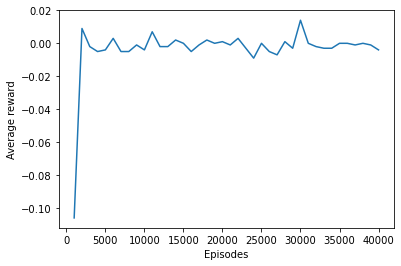

In [4]:
plt.plot(1000*(np.arange(len(avgRewardList)) + 1), avgRewardList)
plt.xlabel('Episodes')
plt.ylabel('Average reward')

print('Optimal action is {} '.format(Pi.astype(int)))
print('Best long-term move is to not play at all, as expected.')